## Regression models implementation
1. Linear regression
2. Logistic regression



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Linear regression model.
Load data with required features to DataFrame, create numpy arrays for model, create $\Theta$ vector:

In [12]:
df = pd.read_csv("CO2_Emissions_Canada.csv")
X_init = np.transpose(np.array(df.loc[(df['Fuel Type']=='Z')|(df['Fuel Type']=='X'), "Fuel Consumption Comb (L/100 km)"], ndmin=2))
Y_init = np.transpose(np.array(df.loc[(df['Fuel Type']=='Z')|(df['Fuel Type']=='X'),"CO2 Emissions(g/km)"],ndmin=2))
theta = np.zeros((X_init.shape[1]+1,1))

Exporting table to LaTeX:

In [13]:
ltx = df.loc[0:10, ["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]].to_latex()
print(ltx)

\begin{tabular}{lrr}
\toprule
{} &  Fuel Consumption Comb (L/100 km) &  CO2 Emissions(g/km) \\
\midrule
0  &                               8.5 &                  196 \\
1  &                               9.6 &                  221 \\
2  &                               5.9 &                  136 \\
3  &                              11.1 &                  255 \\
4  &                              10.6 &                  244 \\
5  &                              10.0 &                  230 \\
6  &                              10.1 &                  232 \\
7  &                              11.1 &                  255 \\
8  &                              11.6 &                  267 \\
9  &                               9.2 &                  212 \\
10 &                               9.8 &                  225 \\
\bottomrule
\end{tabular}



Creating training set for learning, defining main functions:

In [14]:
#define taining set and 
X = X_init[0:20]
Y = Y_init[0:20]

def Cost(theta):
    x = np.ones((X.shape[0],X.shape[1]+1))
    x[:,1:] = X
    return np.matmul(np.transpose((np.matmul(x,theta) - Y)), (np.matmul(x,theta) - Y))[0,0]  / (2*x.shape[0])


def grad(theta):
    x = np.zeros((X.shape[0],X.shape[1]+1))
    x[:,1:] = X
    return np.matmul(np.transpose(x), (np.matmul(x,theta) - Y)) / x.shape[0]  


def gradient_descent(grad, theta, iterations, alpha):
    value = []
    for i in range(0, iterations):
        theta = theta - alpha * grad(theta)
        value += [Cost(theta)]
    return value, theta

Launching gradient descent algorithm with different parameters $\alpha$:

In [15]:
a,t = gradient_descent(grad, theta, 100, 0.001)
d,t = gradient_descent(grad, theta, 30, 0.02)
b,t =  gradient_descent(grad, theta, 350000, 0.0127)
theta = t

Plotting results of algorithm execution:

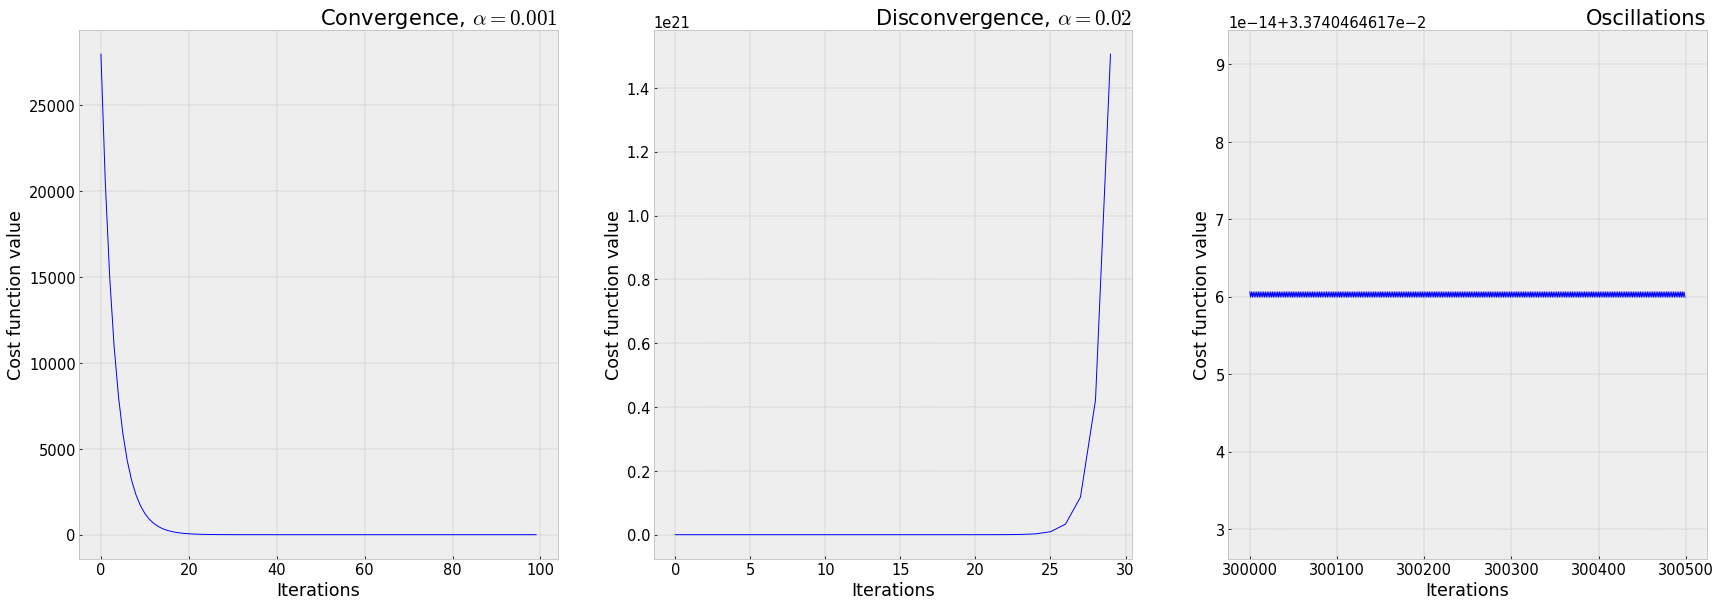

In [17]:

fig = plt.figure(figsize=(30, 10), dpi=70)
plt.style.use('bmh')
plt.rcParams.update({'font.size': 15})

ax = fig.add_subplot(131)
bx = fig.add_subplot(132)
cx = fig.add_subplot(133)

line = ax.plot([i for i in range(0, 100)], a, linewidth=1, color='blue')
line = bx.plot([i for i in range(0, 30)], d, linewidth=1, color='blue')
line = cx.plot([(i+300000) for i in range(0, 500)], b[300000:300500], linewidth=1, color='blue')
ax.set_title(r"Convergence, $\alpha = 0.001$", loc='right')
ax.set_ylabel('Cost function value')
ax.set_xlabel('Iterations')
bx.set_title(r"Disconvergence, $\alpha = 0.02$", loc='right')
bx.set_ylabel('Cost function value')
bx.set_xlabel('Iterations')
cx.set_title("Oscillations", loc='right')
cx.set_ylabel('Cost function value')
cx.set_xlabel('Iterations')
#plt.legend(frameon=True, loc='lower right')

plt.savefig("gradient_descent.png")
plt.show()


Plotting trained regression model:

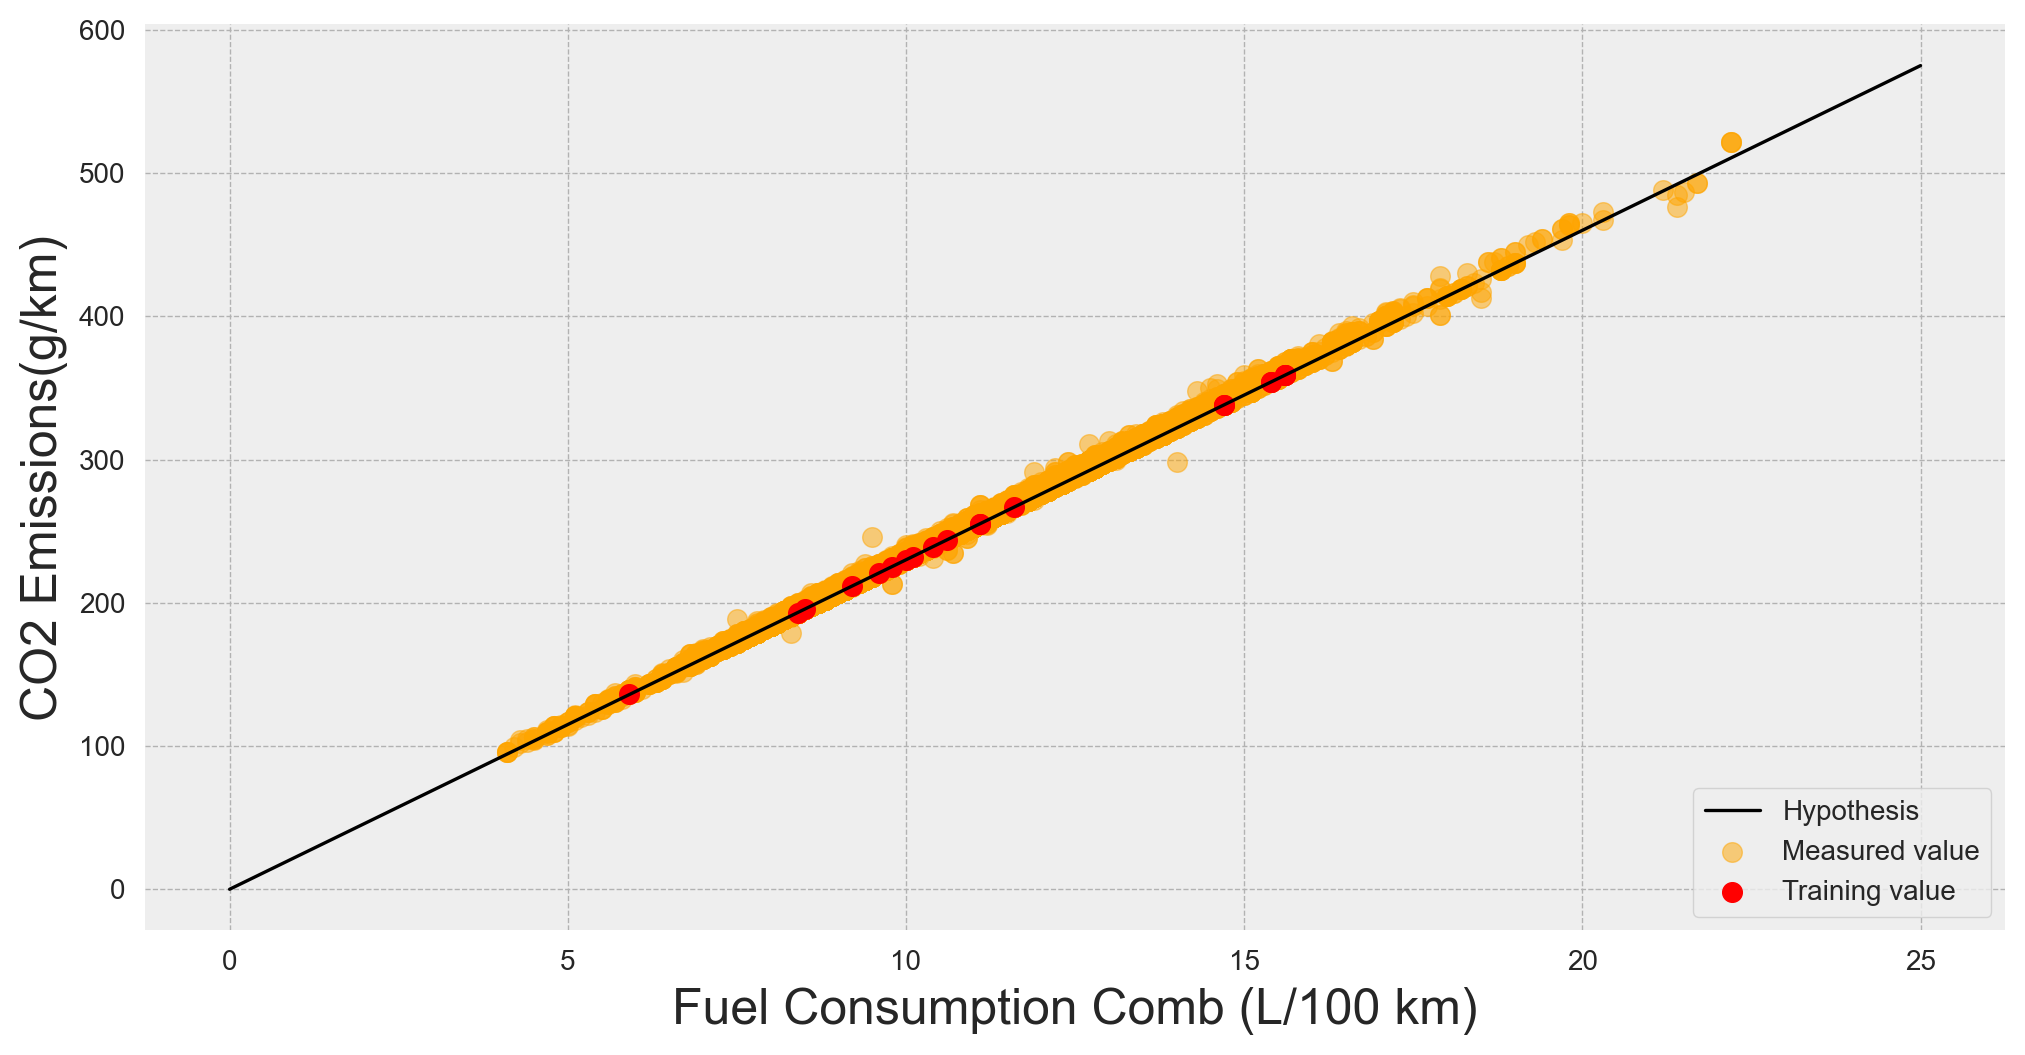

In [26]:
fig = plt.figure(figsize=(12, 6), dpi=200)
plt.style.use('bmh')
ax = fig.add_subplot(111)

stop = 10

line = ax.plot([0,25], [theta[0,0] + theta[1,0]*0,theta[0,0] + theta[1,0]*25], linewidth=1.2, color='black', label='Hypothesis')
scat_pred = ax.scatter(x=X_init[100:], y=Y_init[100:], c='orange', label='Measured value', s=50, alpha=0.5)
scat_tr = ax.scatter(x=X, y=Y, c='red', label='Training value', s=50)

plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')

plt.legend(frameon=True, loc='lower right')

plt.savefig("training_set.png")
plt.show()


#### Classification problem.
load data:

In [32]:
df = pd.read_csv("CO2_Emissions_Canada.csv")

df_c = df.loc[:, ["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)", 'Fuel Type']]
fuel_rev = {'X':"Gasoline", 'Z':'Gasoline', 'D':'Diesel', 'E':'Ethanol', 'N':'Natural gas'}
df_c['Fuel Type'] = df_c['Fuel Type'].map(lambda x:fuel_rev[x])

X_init_c = np.transpose(np.array(df_c.loc[:, ["Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]))
#Y_init_c = np.transpose(np.array(df.loc[(df['Fuel Type']=='Z')|(df['Fuel Type']=='X'),"Cylinders"],ndmin=2))
theta_c = np.zeros((X_init.shape[1]+1,1))



df_gasoline = df_c.loc[(df_c["Fuel Type"]=='Gasoline'), :].reset_index(drop=True)
df_diesel = df_c.loc[(df_c["Fuel Type"]=='Diesel'), :].reset_index(drop=True)
df_ethanol = df_c.loc[(df_c["Fuel Type"]=='Ethanol'), :].reset_index(drop=True)

df_gasoline = df_gasoline.iloc[np.random.randint(0, 6000, 50), :]
df_diesel = df_diesel.iloc[np.random.randint(0, 174, 50), :]
df_ethanol = df_ethanol.iloc[np.random.randint(0, 360, 50), :]
df_training = pd.concat([df_gasoline, df_diesel, df_ethanol])


Exporting table to LaTeX:

In [29]:
ltx = df_c.loc[np.random.randint(0, 6000, 10), :].to_latex()
print(ltx)

\begin{tabular}{lrrl}
\toprule
{} &  Fuel Consumption Comb (L/100 km) &  CO2 Emissions(g/km) & Fuel Type \\
\midrule
4746 &                              12.4 &                  291 &  Gasoline \\
1003 &                              13.1 &                  301 &  Gasoline \\
36   &                              15.5 &                  363 &  Gasoline \\
5654 &                              18.4 &                  306 &   Ethanol \\
3949 &                              12.2 &                  289 &  Gasoline \\
302  &                              11.2 &                  258 &  Gasoline \\
1696 &                              12.2 &                  195 &   Ethanol \\
575  &                              10.9 &                  251 &  Gasoline \\
2479 &                              17.6 &                  288 &   Ethanol \\
2892 &                              10.9 &                  254 &  Gasoline \\
\bottomrule
\end{tabular}



Plotting training data:

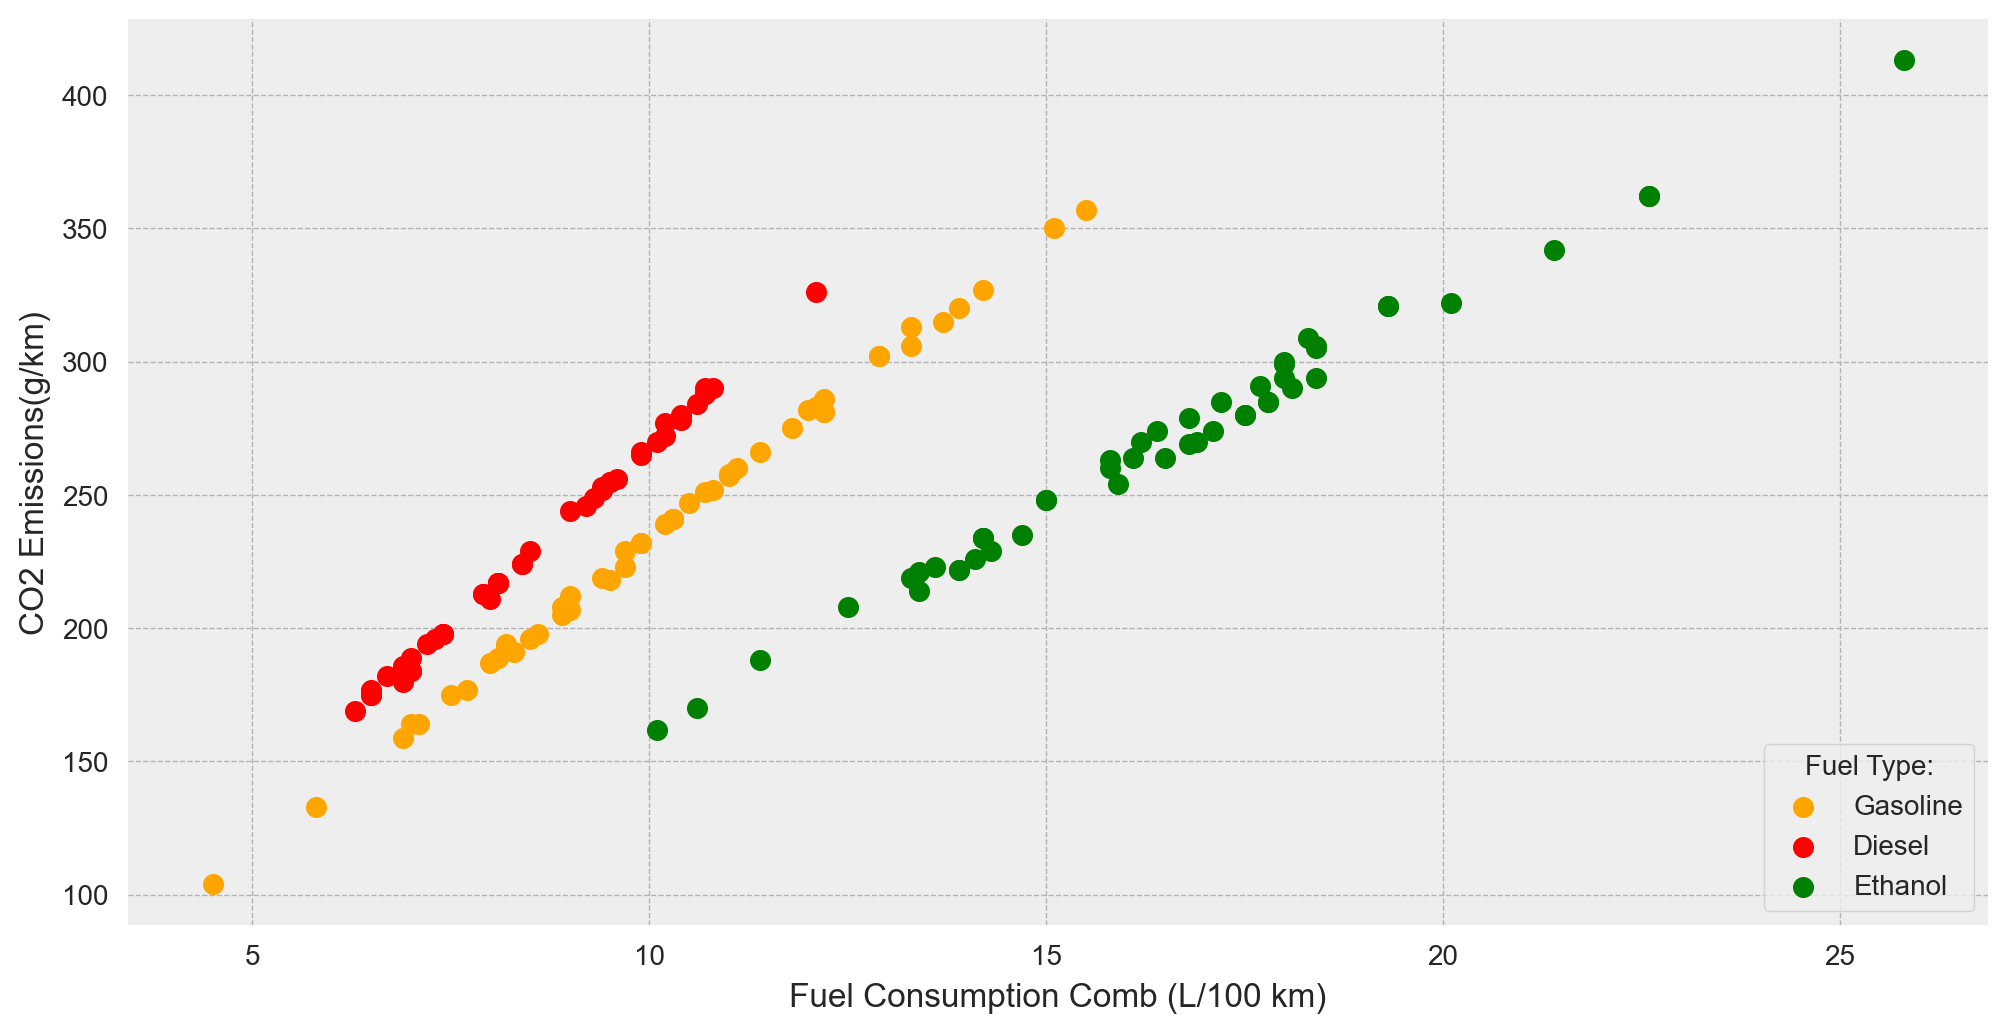

In [35]:
# plot training data
fig = plt.figure(figsize=(12, 6), dpi=200)
plt.style.use('bmh')
plt.rcParams.update({'font.size': 10})

ax = fig.add_subplot(111)

scat_gasoline = ax.scatter(x=df_gasoline["Fuel Consumption Comb (L/100 km)"], y=df_gasoline["CO2 Emissions(g/km)"], c='orange', label='Gasoline', s=50)
scat_diesel = ax.scatter(x=df_diesel["Fuel Consumption Comb (L/100 km)"], y=df_diesel["CO2 Emissions(g/km)"], c='red', label='Diesel', s=50)
scat_ethanol = ax.scatter(x=df_ethanol["Fuel Consumption Comb (L/100 km)"], y=df_ethanol["CO2 Emissions(g/km)"], c='green', label='Ethanol', s=50)


plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')

plt.legend(frameon=True, title='Fuel Type:', loc="lower right")

plt.savefig("fuel_type.png")
plt.show()


Data normalization:

In [36]:
mean = df_c.mean()
std = df_c.std()


In [37]:
df_test = (df_c - mean) / std
df_test.min()

CO2 Emissions(g/km)                -2.641901
Fuel Consumption Comb (L/100 km)   -2.376856
Fuel Type                                NaN
dtype: float64

Defining main furnctions:

In [38]:
def sigmoid(A):
    return 1 / (1 + np.exp(-A))


def Cost_logistic(theta, X, Y):
    h = sigmoid(np.matmul(X, theta))    
    return -(np.matmul(np.transpose(Y), np.log(h)) + np.matmul(np.transpose(1 - Y), np.log(1 - h)) )[0,0]  / (X.shape[0])


def grad_logistic(theta, X, Y):
    h = sigmoid(np.matmul(X, theta)) 
    return np.matmul(np.transpose(X), h - Y) / X.shape[0]  


def gradient_descent_c(gradient, theta, X, Y, iterations, alpha):
    for i in range(0, iterations):
        theta = theta - alpha * gradient(theta, X, Y)
    return theta

def hypothesis(x1, x2, theta):
    X = np.array([1, x1, x2, x1*x1, x1*x2, x2*x2], ndmin=2)
    return sigmoid(np.matmul(X, theta))
    
    
def learn(df):
    # adding bias column with ones
    df_input = (df-mean)/std
    X = np.array(df_input.loc[:, ['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])
    x = np.ones((X.shape[0],X.shape[1]+1))
    x[:,1:] = X
    # map X into new format to represent polynomial regression
    T = np.transpose(np.array([x[:, 0], x[:, 1], x[:, 2], x[:, 1]*x[:, 1], x[:, 1]*x[:, 2], x[:, 2]*x[:, 2],]))
    theta = np.ones((T.shape[1], 1))
    # process y
    theta_list = []
    for obj in df['Fuel Type'].unique():
        print("Current: ", obj)
        theta = np.ones((T.shape[1], 1))
        Y = np.transpose(np.array((df['Fuel Type']==obj).astype(int), ndmin=2))
        theta = gradient_descent_c(grad_logistic, theta, T, Y, 50000, 0.3)
        theta_list += [theta]
        print("Cost: ", Cost_logistic(theta, T, Y))
    return theta_list

Launching algorithm:

In [39]:
t_l = learn(df_training)
t_l

Current:  Gasoline
Cost:  0.007197360331073623
Current:  Diesel
Cost:  0.002317481624367236
Current:  Ethanol
Cost:  0.00024270950929861914


[array([[  6.11282626],
        [  9.19744984],
        [ -6.06643664],
        [-20.58870345],
        [ 32.56969989],
        [-12.10771282]]),
 array([[ -7.91285326],
        [-22.69020838],
        [ 18.30205496],
        [  5.26256736],
        [ -4.63021279],
        [ -0.63896004]]),
 array([[-6.81488904],
        [ 8.1182887 ],
        [-7.18029158],
        [ 1.91070289],
        [-5.3127062 ],
        [ 2.6884979 ]])]